In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])


batch_size = 8


trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)


classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
running_loss = 0.0
accuracy = 0.0
epochs = 3
loss_history = []
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0} lr: {1}'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        

        inputs, labels = data
        optimizer.zero_grad()

       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:   

            print("Training loss {} Steps: {}".format(running_loss / 1000, epoch * len(trainloader) + i))
            loss_history.append(running_loss / 1000)
            running_loss = 0.0
print('Finished Training')

Epoch-1 lr: 0.001
Training loss 1.7944165393561124 Steps: 999
Training loss 0.7962085070535541 Steps: 1999
Training loss 0.6549348994642497 Steps: 2999
Training loss 0.6069892512075603 Steps: 3999
Training loss 0.5712410438628868 Steps: 4999
Training loss 0.5277663764320314 Steps: 5999
Training loss 0.49188363722339273 Steps: 6999
Epoch-2 lr: 0.001
Training loss 0.686557362136431 Steps: 8499
Training loss 0.4421073599341325 Steps: 9499
Training loss 0.42238399635255336 Steps: 10499
Training loss 0.4251355299167335 Steps: 11499
Training loss 0.41410092905722556 Steps: 12499
Training loss 0.4155570615855977 Steps: 13499
Training loss 0.40002504582260734 Steps: 14499
Epoch-3 lr: 0.001
Training loss 0.5541455943970941 Steps: 15999
Training loss 0.37542438628501257 Steps: 16999
Training loss 0.36505436772014943 Steps: 17999
Training loss 0.36832582810847087 Steps: 18999
Training loss 0.3642083155061118 Steps: 19999
Training loss 0.3544406419233419 Steps: 20999
Training loss 0.35313002075138

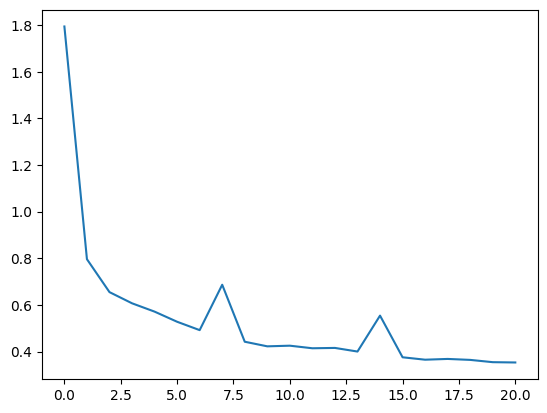

In [ ]:
plt.plot(range(len(loss_history)), loss_history)

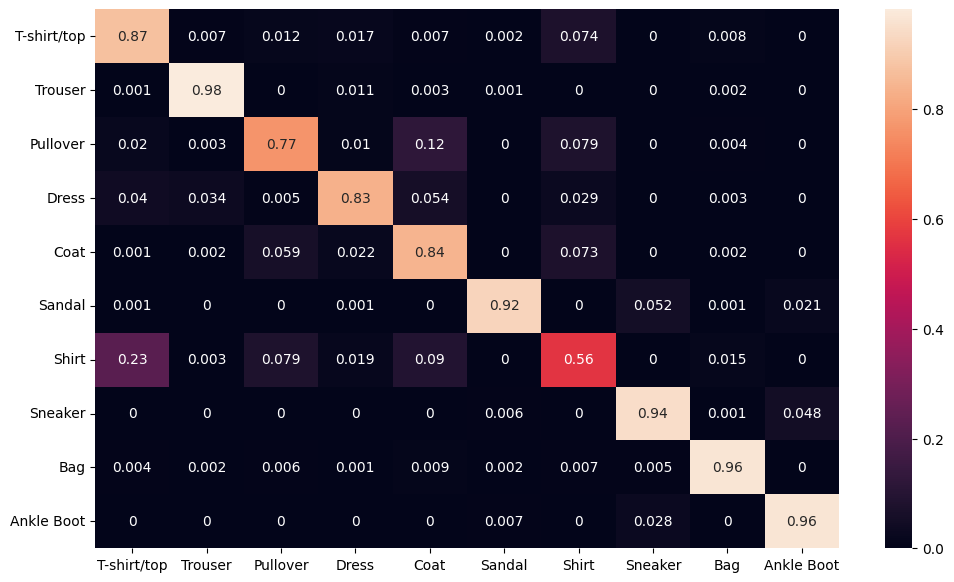

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []


for inputs, labels in testloader:
        output = net(inputs) 

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) 
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 


cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])


batch_size = 16


trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
running_loss = 0.0
accuracy = 0.0
epochs = 3
loss_history = []

for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0} lr: {1}'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        

        inputs, labels = data
        optimizer.zero_grad()

       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:   

            print("Training loss {} Steps: {}".format(running_loss / 1000, epoch * len(trainloader) + i))
            loss_history.append(running_loss / 1000)
            running_loss = 0.0
print('Finished Training')

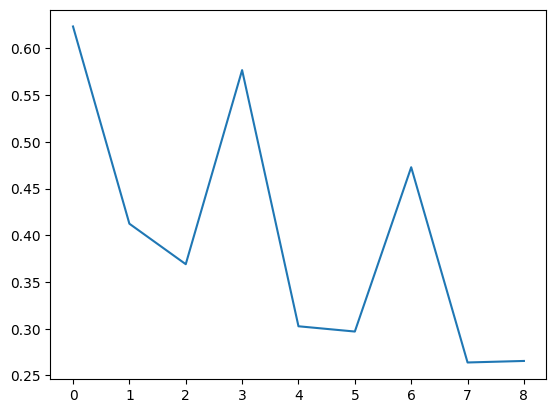

In [ ]:
plt.plot(range(len(loss_history)), loss_history)

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f78f3a285e0>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f78f3a285e0>Traceback (most recent call last):

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: 
  File "/usr/lib/python3.9/multiprocessing/process.p

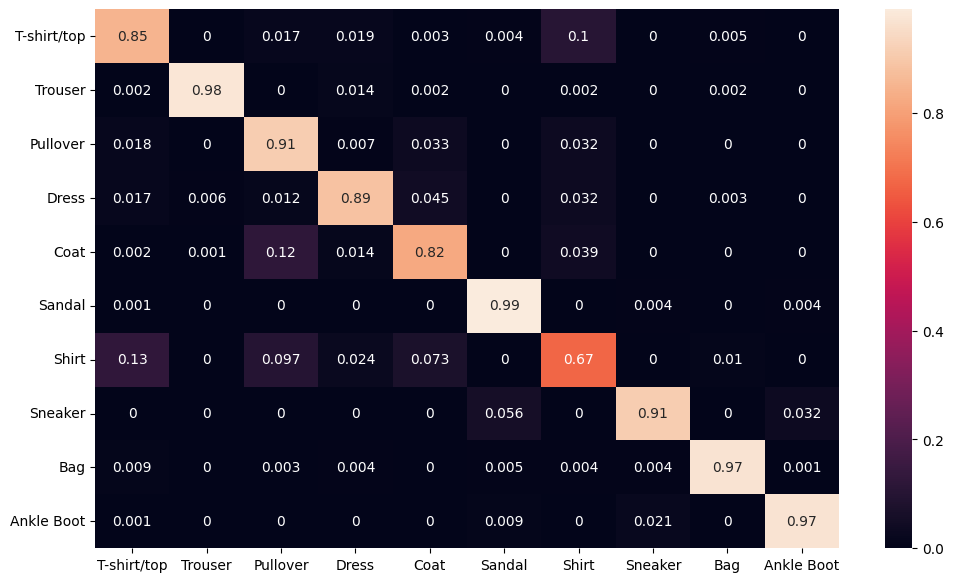

In [ ]:
y_pred = []
y_true = []


for inputs, labels in testloader:
        output = net(inputs) 

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) 
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 


cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])


batch_size = 2


trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(2, 4, 5)
        self.fc1 = nn.Linear(4 * 4 * 4, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
running_loss = 0.0
accuracy = 0.0
epochs = 3
loss_history = []

for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0} lr: {1}'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        

        inputs, labels = data
        optimizer.zero_grad()

       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:   

            print("Training loss {} Steps: {}".format(running_loss / 1000, epoch * len(trainloader) + i))
            loss_history.append(running_loss / 1000)
            running_loss = 0.0
print('Finished Training')

Epoch-1 lr: 0.001
Training loss 1.2408510968647897 Steps: 999
Training loss 0.7639498246954755 Steps: 1999
Training loss 0.7217700660678092 Steps: 2999
Training loss 0.662769316509366 Steps: 3999
Training loss 0.6597668941011652 Steps: 4999
Training loss 0.6460087588946335 Steps: 5999
Training loss 0.6401661174528417 Steps: 6999
Training loss 0.5720784026339534 Steps: 7999
Training loss 0.6111708051860333 Steps: 8999
Training loss 0.5489249051630614 Steps: 9999
Training loss 0.5607457924774936 Steps: 10999
Training loss 0.5327253702798044 Steps: 11999
Training loss 0.5570431882828707 Steps: 12999
Training loss 0.5398502907405054 Steps: 13999
Training loss 0.4863559214326233 Steps: 14999
Training loss 0.5235395813643773 Steps: 15999
Training loss 0.5364184879708337 Steps: 16999
Training loss 0.47435978404421986 Steps: 17999
Training loss 0.4802356375435411 Steps: 18999
Training loss 0.5427394108101434 Steps: 19999
Training loss 0.477956222662644 Steps: 20999
Training loss 0.493979616016

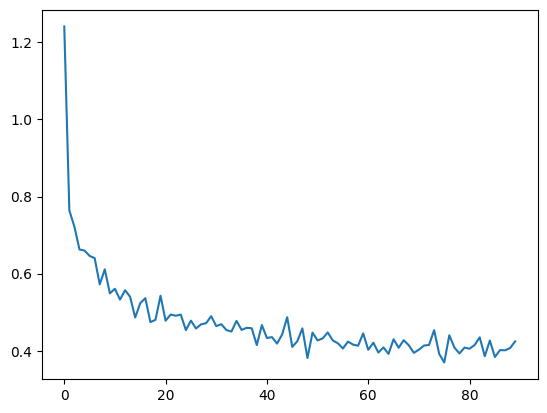

In [ ]:
plt.plot(range(len(loss_history)), loss_history)

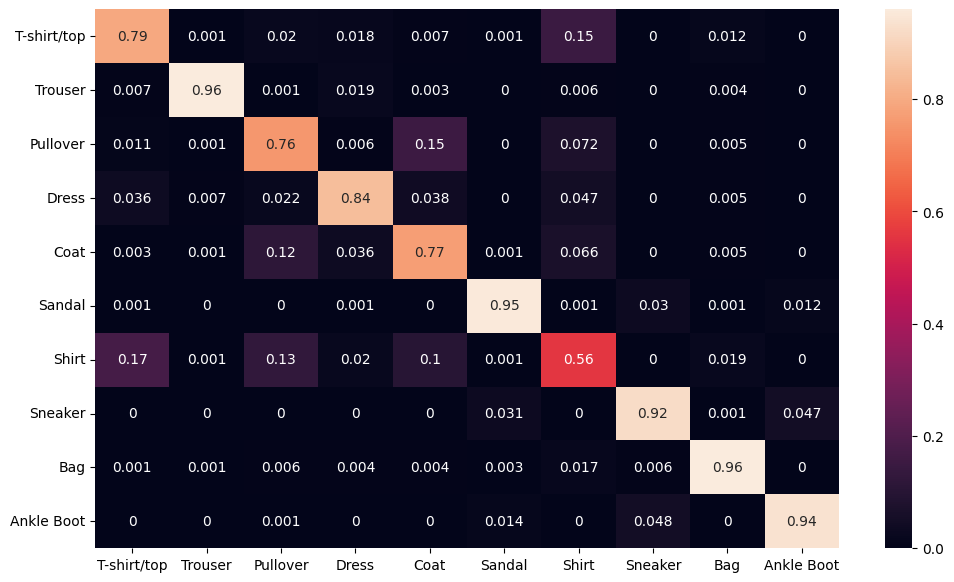

In [ ]:
y_pred = []
y_true = []


for inputs, labels in testloader:
        output = net(inputs) 

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) 
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 


cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output3.png')

Im mniejsze batch_size, im węcej iteracji ma trening. 
Jednak mając większe batch_size (16) mamy podobny wynik do mniekszego (2).
Więc nie zawsze to się opłaca.